In [1]:
import HearthstoneSim
import ArenaSim
using Statistics
using DataStructures
using Random

In [2]:
deckfolder = joinpath(homedir(), "packages/HearthstoneSim/decks")
hsdecks = readdir(deckfolder)
hsdecks = OrderedDict([
        name => HearthstoneSim.deckreader(joinpath(deckfolder, name)) for
            name in hsdecks
        ]);
show(hsdecks)

OrderedDict("01 - Malygos Druid.txt"=>[("Innervate", 1), ("Moonfire", 2), ("Lesser Jasper Spellstone", 2), ("Naturalize", 2), ("Wild Growth", 2), ("Ferocious Howl", 2), ("Branching Paths", 2), ("Swipe", 2), ("Twig of the World Tree", 1), ("Arcane Tyrant", 2), ("Faceless Manipulator", 1), ("Nourish", 2), ("Starfall", 1), ("Spreading Plague", 2), ("Malfurion the Pestilent", 1), ("The Lich King", 1), ("Alexstrasza", 1), ("Malygos", 1), ("Ultimate Infestation", 2)],"02 - Even Warlock.txt"=>[("Acidic Swamp Ooze", 1), ("Defile", 2), ("Plated Beetle", 1), ("Stubborn Gastropod", 2), ("Sunfury Protector", 2), ("Vulgar Homunculus", 2), ("Hellfire", 2), ("Hooked Reaver", 2), ("Lesser Amethyst Spellstone", 2), ("Shroom Brewer", 2), ("Spellbreaker", 2), ("Twilight Drake", 2), ("Dread Infernal", 1), ("Genn Greymane", 1), ("Siphon Soul", 1), ("The Black Knight", 1), ("The Lich King", 1), ("Bloodreaver Gul'dan", 1), ("Mountain Giant", 2)],"03 - Combo Shaman.txt"=>[("Earth Shock", 2), ("Glacial Shard",

In [3]:
deckfolder = joinpath(homedir(), "packages/ArenaSim/decks")
mtgadecks = readdir(deckfolder)
mtgadecks = map(fn -> ArenaSim.deckreader_mtga_format(joinpath(deckfolder, fn)), mtgadecks)
mtgadecks = ArenaSim.deckinfo.(mtgadecks)

12-element Array{Array{NamedTuple{(:name, :amount, :prints),Tuple{String,Int64,Array{NamedTuple{(:index, :set, :rarity),Tuple{Int64,Symbol,Int64}},1}}},1},1}:
 [(name = "Torrential Gearhulk", amount = 3, prints = [(index = 1932, set = :KLD, rarity = 4)]), (name = "Teferi, Hero of Dominaria", amount = 3, prints = [(index = 1847, set = :DOM, rarity = 4)]), (name = "Drowned Catacomb", amount = 4, prints = [(index = 1608, set = :XLN, rarity = 3)]), (name = "Fetid Pools", amount = 4, prints = [(index = 1707, set = :AKH, rarity = 3)]), (name = "Field of Ruin", amount = 2, prints = [(index = 1085, set = :XLN, rarity = 2)]), (name = "Glacial Fortress", amount = 4, prints = [(index = 1609, set = :XLN, rarity = 3)]), (name = "Irrigated Farmland", amount = 3, prints = [(index = 1708, set = :AKH, rarity = 3)]), (name = "Isolated Chapel", amount = 3, prints = [(index = 1493, set = :DOM, rarity = 3)]), (name = "Seal Away", amount = 2, prints = [(index = 871, set = :DOM, rarity = 2)]), (name = "Cast 

In [4]:
hs_sim_results = HearthstoneSim.shufflesim(HearthstoneSim.DecklistArray(hsdecks),
    parameters = HearthstoneSim.HearthstoneSimParameters(welcome_bundle = false), reps = 100, batchsize = 100
);

arena_sim_results = ArenaSim.shufflesim(mtgadecks; parameters = ArenaSim.SimParameters(welcome_bundle =false),
    reps = 100, batchsize = 100);

In [5]:
hs_packs_per_week_f2p = 7.0;
arena_packs_per_week_f2p = 11.05;
hs_dollar_per_pack = 70/60;
arena_dollar_per_pack = 1.0;
# price_adjust = vcat(5 ,repeat([0], 11));
price_adjust = zeros(Float64, 12);

In [6]:
hs_packs = mean(reduce(+, values(hs_sim_results.total_packs_for_deck)), dims = 2)[:,1]
round.(hcat(hs_packs, hs_packs/hs_packs_per_week_f2p, hs_packs * hs_dollar_per_pack + price_adjust); sigdigits = 2)

12×3 Array{Float64,2}:
 72.0  10.0  84.0
 76.0  11.0  88.0
 57.0   8.2  67.0
 58.0   8.3  68.0
 51.0   7.2  59.0
 43.0   6.1  50.0
 44.0   6.3  52.0
 36.0   5.2  43.0
 36.0   5.1  42.0
 34.0   4.9  40.0
 32.0   4.6  37.0
 27.0   3.9  32.0

In [7]:
arena_packs = mean(reduce(+, values(arena_sim_results.packs_opened)), dims = 1)[1,:]
round.(hcat(arena_packs, arena_packs / arena_packs_per_week_f2p, arena_packs * arena_dollar_per_pack + price_adjust); sigdigits = 2)

12×3 Array{Float64,2}:
 92.0  8.3  92.0
 89.0  8.1  89.0
 71.0  6.4  71.0
 59.0  5.3  59.0
 47.0  4.3  47.0
 34.0  3.0  34.0
 32.0  2.9  32.0
 31.0  2.8  31.0
 25.0  2.2  25.0
 22.0  2.0  22.0
 18.0  1.7  18.0
 17.0  1.5  17.0

In [8]:
using PyPlot

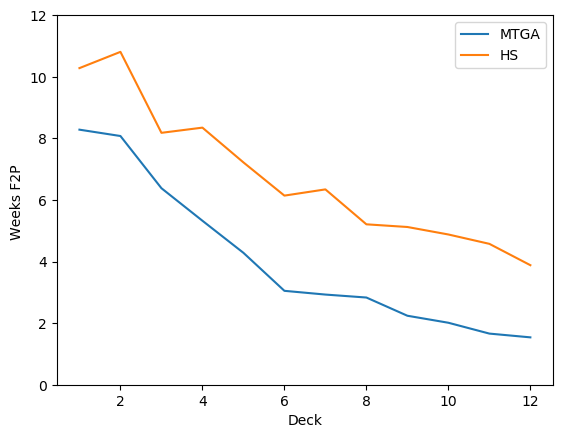

PyObject <matplotlib.legend.Legend object at 0x7f5b822e6048>

In [9]:
plot(1:12, arena_packs / arena_packs_per_week_f2p, label = "MTGA")
plot(1:12, hs_packs / hs_packs_per_week_f2p, label = "HS")
xlabel("Deck")
ylabel("Weeks F2P ")
ylim(0,12)
legend()

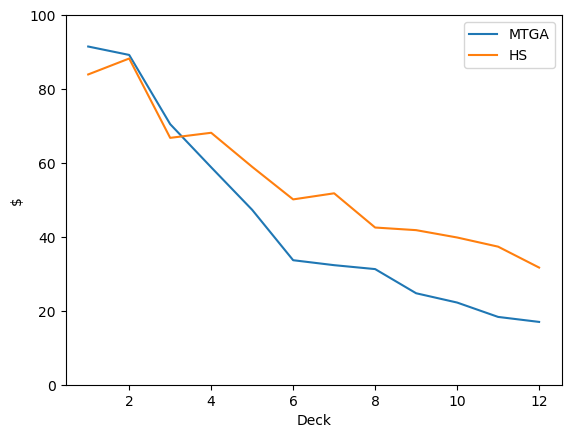

PyObject <matplotlib.legend.Legend object at 0x7f5b82245128>

In [10]:
plot(1:12, arena_packs * arena_dollar_per_pack + price_adjust, label = "MTGA")
plot(1:12, hs_packs * hs_dollar_per_pack + price_adjust, label = "HS")
xlabel("Deck")
ylabel("\$")
ylim(0,100)
legend()